# Bank-Statement-analysis

### In this I took my personal bank account data to analyze, It is the year of April2022 to March2023. It having great analysis of the data 

### : Attribute information :  ###

 DATE : This column contain the date of transaction.

 NARRATION : This column contain the information about the Tharnsaction party.

 WITHDRAWAL(DR) : The ammout that I Withdrawal from the account.

 DEPOSIT(CR) : The ammout that I Deposit from the account.

 BALANCE(INR) : Total balance on account.


# Load the required Libraries

In [1]:
# import numpy 
import numpy as np

# import pandas
import pandas as pd

# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt

# Load the data (BOB bank Statement)

In [2]:
# This data is from st 1st April 2022 to 31st March 2023
# Load the data

data_bob = pd.read_csv("Bob Statement.csv")
data_bob.head()

,DATE,NARRATION,WITHDRAWAL(DR),DEPOSIT(CR),BALANCE(INR)
0,02-04-2022,UPI/209287719641/21:51:09/UPI/paytm-56326471@payt,100,0,"32,219.75"
1,02-04-2022,UPI/209182697196/23:15:45/UPI/paytm-56326471@payt,90,0,"32,319.75"
2,07-04-2022,UPI/209682146085/23:47:35/UPI/paytm-47108701@payt,150,0,"32,069.75"
3,08-04-2022,UPI/209788617235/23:51:35/UPI/paytm-56326471@payt,20,0,"31,969.75"
4,08-04-2022,UPI/209788611342/23:51:17/UPI/paytm-56326471@payt,80,0,"31,989.75"


In [3]:
# It is show the number of columns and rows.
data_bob.shape

(436, 5)

In [4]:
# It is a show the columns names. 
data_bob.columns

Index(['DATE', 'NARRATION', 'WITHDRAWAL(DR)', 'DEPOSIT(CR)', 'BALANCE(INR)'], dtype='object')

In [5]:
data_bob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            436 non-null    object
 1   NARRATION       436 non-null    object
 2   WITHDRAWAL(DR)  436 non-null    object
 3   DEPOSIT(CR)     436 non-null    object
 4   BALANCE(INR)    436 non-null    object
dtypes: object(5)
memory usage: 17.2+ KB


# Change the data types of date column. 

In [6]:
import datetime 
data_bob["DATE"]=pd.to_datetime(data_bob["DATE"],format='mixed')

In [7]:
data_bob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            436 non-null    datetime64[ns]
 1   NARRATION       436 non-null    object        
 2   WITHDRAWAL(DR)  436 non-null    object        
 3   DEPOSIT(CR)     436 non-null    object        
 4   BALANCE(INR)    436 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 17.2+ KB


# To replace the comma from the deposite column. 

In [8]:
data_bob["DEPOSIT(CR)"]=data_bob['DEPOSIT(CR)'].str.replace(',','') 
data_bob["WITHDRAWAL(DR)"]=data_bob['WITHDRAWAL(DR)'].str.replace(',','') 
data_bob["BALANCE(INR)"]=data_bob['BALANCE(INR)'].str.replace(',','')

In [9]:
data_bob.head(5)

,DATE,NARRATION,WITHDRAWAL(DR),DEPOSIT(CR),BALANCE(INR)
0,2022-02-04,UPI/209287719641/21:51:09/UPI/paytm-56326471@payt,100,0,32219.75
1,2022-02-04,UPI/209182697196/23:15:45/UPI/paytm-56326471@payt,90,0,32319.75
2,2022-07-04,UPI/209682146085/23:47:35/UPI/paytm-47108701@payt,150,0,32069.75
3,2022-08-04,UPI/209788617235/23:51:35/UPI/paytm-56326471@payt,20,0,31969.75
4,2022-08-04,UPI/209788611342/23:51:17/UPI/paytm-56326471@payt,80,0,31989.75


# Change the data type of following column. 

In [10]:
data_bob["DEPOSIT(CR)"] = data_bob['DEPOSIT(CR)'].astype(float)
data_bob["WITHDRAWAL(DR)"] = data_bob['WITHDRAWAL(DR)'].astype(float)
data_bob["BALANCE(INR)"] = data_bob['BALANCE(INR)'].astype(float)

In [11]:
data_bob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            436 non-null    datetime64[ns]
 1   NARRATION       436 non-null    object        
 2   WITHDRAWAL(DR)  436 non-null    float64       
 3   DEPOSIT(CR)     436 non-null    float64       
 4   BALANCE(INR)    436 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 17.2+ KB


# Total income and Total Expense

In [12]:
Total_income = data_bob["DEPOSIT(CR)"].sum()
Total_Expense = data_bob["WITHDRAWAL(DR)"].sum()

print("Total_income:" ,Total_income)

print("Total_expense:" ,Total_Expense)


Total_income: 924152.3200000001
Total_expense: 813297.6000000001


# Monthly spending patterns

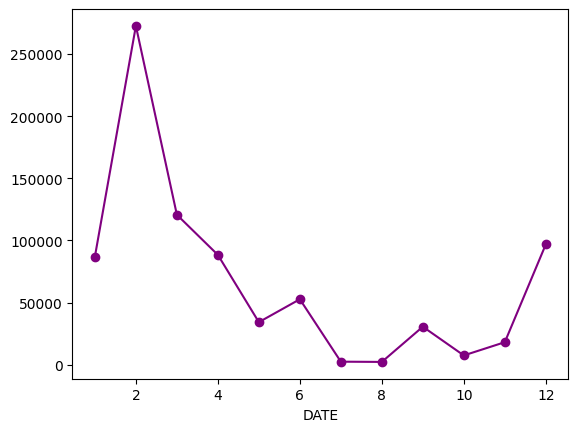

In [13]:
monthly_expenses = data_bob.groupby(data_bob['DATE'].dt.month)['WITHDRAWAL(DR)'].sum()
monthly_expenses.plot(color = "purple",marker='o')
plt.show()

### Observation

In the month of february has more spending as compare to other month

# Highest Expenses 

In [15]:
top_expenses = data_bob.nlargest(5, 'WITHDRAWAL(DR)')
top_expenses[["DATE","NARRATION","WITHDRAWAL(DR)"]]

,DATE,NARRATION,WITHDRAWAL(DR)
80,2022-02-06,SELF,200000.0
83,2022-04-06,SELF,68000.0
334,2023-01-30,UPI/339671673851/22:06:15/UPI/nitabhagat62@okaxis,50000.0
178,2022-06-10,UPI/227972061435/21:38:27/UPI/909010041421331@UTI,49080.0
414,2023-03-21,UPI/344609270502/08:39:32/UPI/9913889933@paytm/NA,35000.0


# Average Monthly Balance:

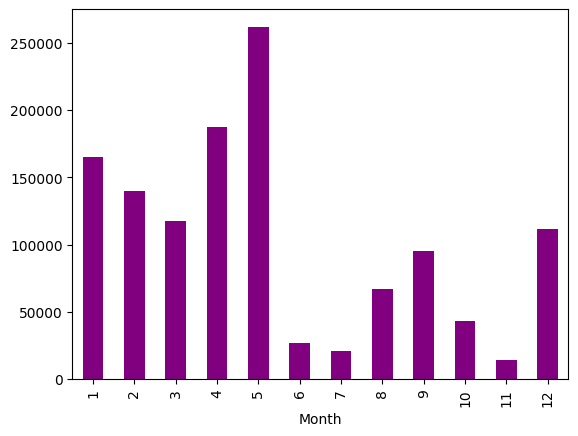

In [16]:
# Calculate the average monthly balance based on the closing balance for each month.

data_bob['Month'] = data_bob['DATE'].dt.month
average_monthly_balance = data_bob.groupby('Month')['BALANCE(INR)'].mean()

average_monthly_balance.plot(kind = "bar",color = "purple")
plt.show()

### Observation

In the following five month the bank balance is more than other month.

# Income vs. Expenses Over Time:

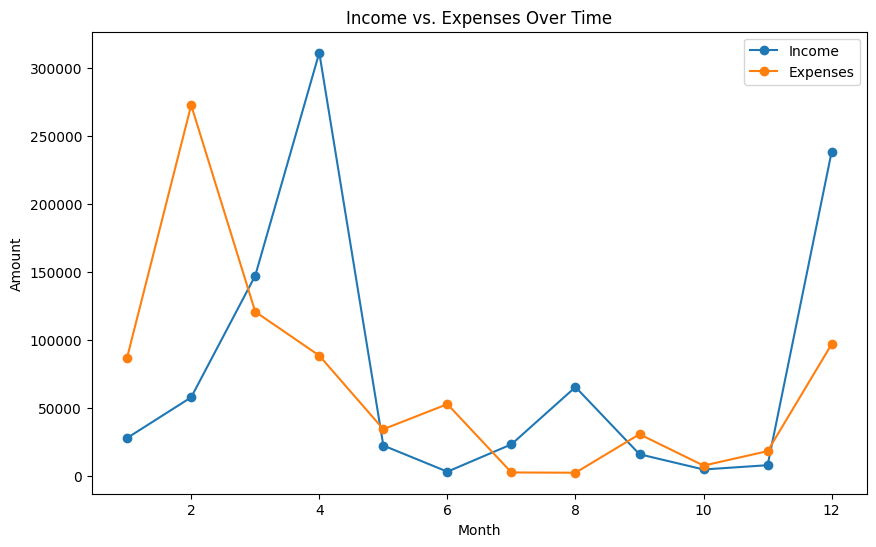

In [28]:
# Visualize the trend of your income and expenses over the months.

monthly_income = data_bob.groupby('Month')['DEPOSIT(CR)'].sum()
monthly_expenses = data_bob.groupby('Month')['WITHDRAWAL(DR)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_income.index, monthly_income, label='Income', marker='o')
plt.plot(monthly_expenses.index, monthly_expenses, label='Expenses', marker='o')

plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Income vs. Expenses Over Time')

plt.legend()
plt.show()

### Observation

The income rise qucikly between January to April. After this it is slowly down 

The february month the expense is more than other month.

# Day of the Week Analysis:

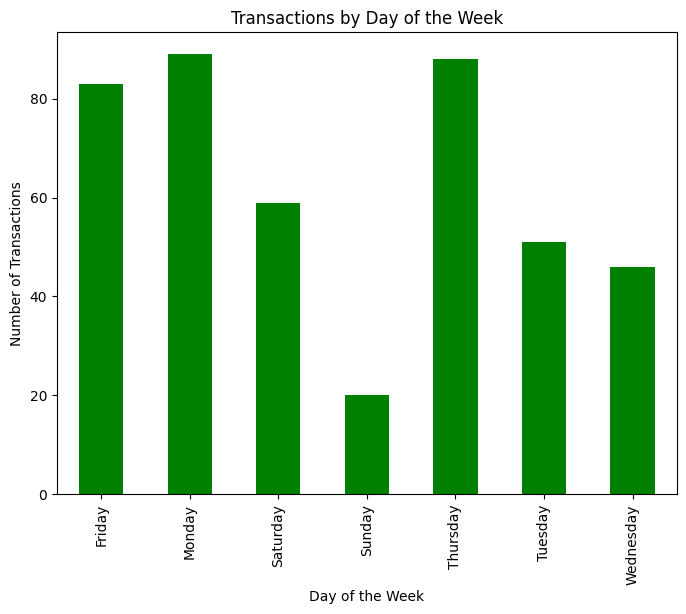

In [18]:
# Check if there's any pattern in your transactions based on the day of the week.

data_bob['Day_of_Week'] = data_bob['DATE'].dt.day_name()
transactions_by_day = data_bob.groupby('Day_of_Week').size()

plt.figure(figsize=(8, 6))
transactions_by_day.plot(kind='bar',color = "green")

plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Day of the Week')


plt.show()

### Observation

In Monday and Thursday the transactions was highest. 

# Top Income Sources:

In [19]:
# If the 'Narration' column contains details about income sources, you can identify the top sources.

top_income_sources = data_bob.nlargest(5, 'DEPOSIT(CR)')
top_income_sources[["DATE","NARRATION","DEPOSIT(CR)"]]

,DATE,NARRATION,DEPOSIT(CR)
23,2022-04-20,NEFT-210902421GN00105-TATA AIG GENERALINSURANC...,260723.0
264,2022-12-17,NEFT-235100267GN00102-TATA AIG GENERALINSURANC...,186848.0
140,2022-08-09,03280600004185 Disbursement Credit,65000.0
411,2023-03-20,IMPS/P2A/307920676255/JAGRUTMANUBHAIB/-AXB9199259,45000.0
416,2023-03-22,BY INST 146551 : MICR CLG (CTS),43528.0


# Net Cash Flow:

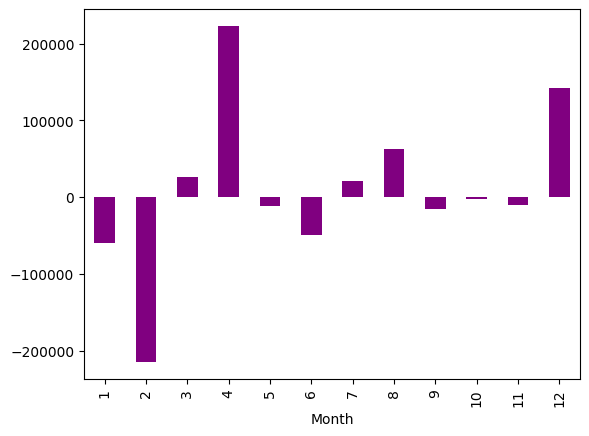

In [20]:
# Calculate the net cash flow for each month (income minus expenses).

data_bob['Net_Cash_Flow'] = data_bob['DEPOSIT(CR)'] - data_bob['WITHDRAWAL(DR)']

monthly_cash_flow = data_bob.groupby('Month')['Net_Cash_Flow'].sum()
monthly_cash_flow.plot(kind = "bar",color = "purple")
plt.show()

### Observation

In april and december month the deposite amount is more than other  

# Transaction Frequency Analysis:

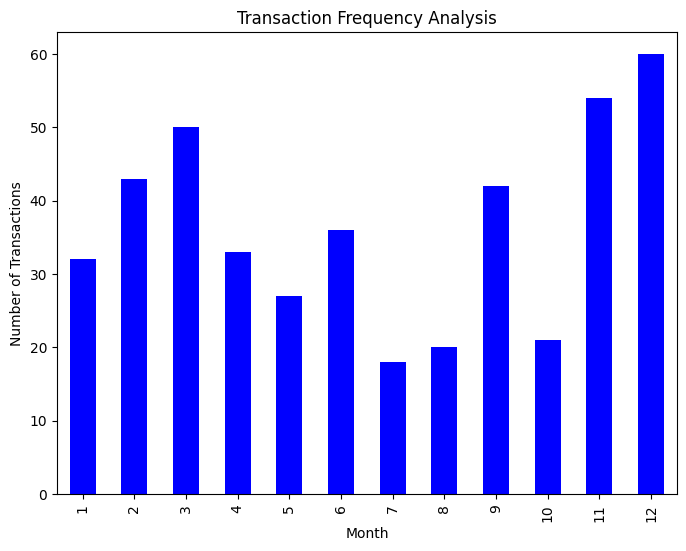

In [21]:
# Analyze the frequency of transactions during the year.

transaction_frequency = data_bob.groupby('Month').size()

plt.figure(figsize=(8, 6))
transaction_frequency.plot(kind='bar',color = "blue")
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Frequency Analysis')
plt.show()

### Obseravtion

The number of transaction is more in the April and december

# Monthly Withdrawal and Deposit Amounts:

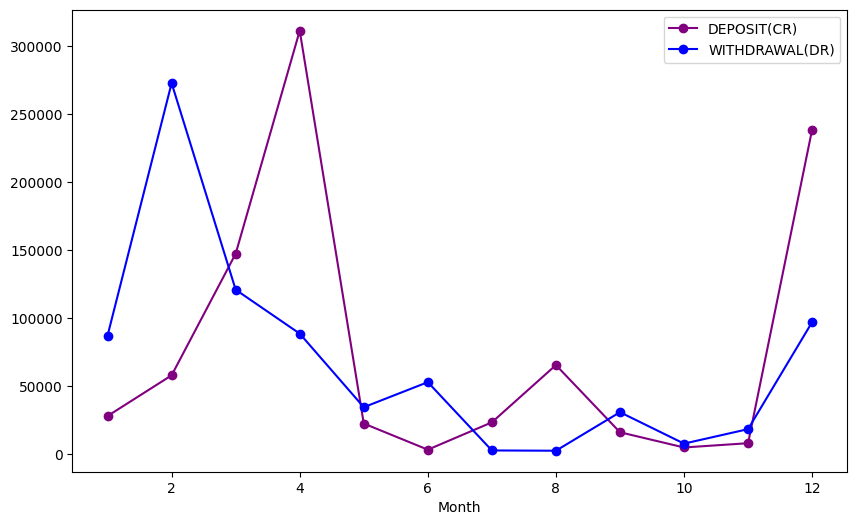

In [22]:
# Calculate the Monthly withdrawal and deposit amounts for each month.

plt.figure(figsize=(10,6))
withdrawal_per_month = data_bob.groupby('Month')['WITHDRAWAL(DR)'].sum()
deposit_per_month = data_bob.groupby('Month')['DEPOSIT(CR)'].sum()

deposit_per_month.plot(kind = "line",color = "purple",marker='o')
withdrawal_per_month.plot(kind = "line",color = "blue",marker='o')

plt.legend()
plt.show()

# Transaction Volume Trend:

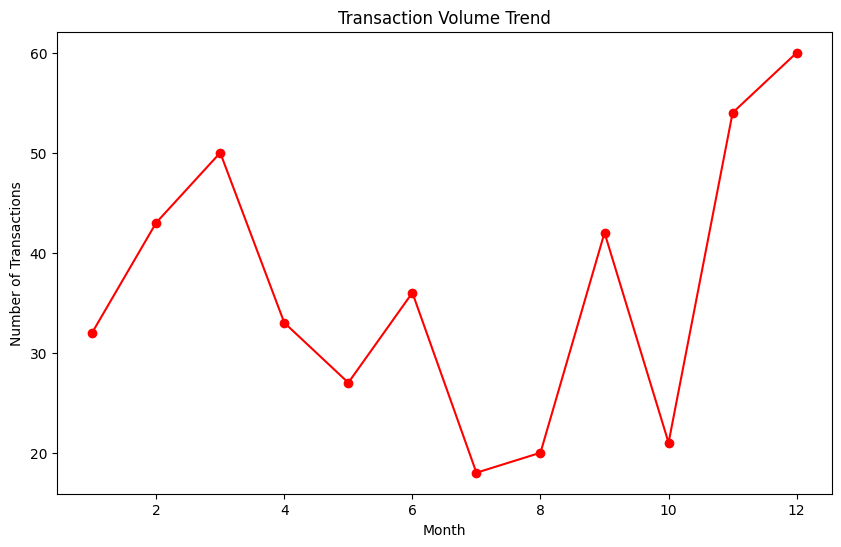

In [23]:
# Visualize the trend of the number of transactions over the months.

monthly_transaction_count = data_bob.groupby('Month').size()

plt.figure(figsize=(10, 6))
monthly_transaction_count.plot(kind='line', marker='o',color = "red")
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transaction Volume Trend')
plt.show()

# Monthly Withdrawal vs. Deposit Comparison:

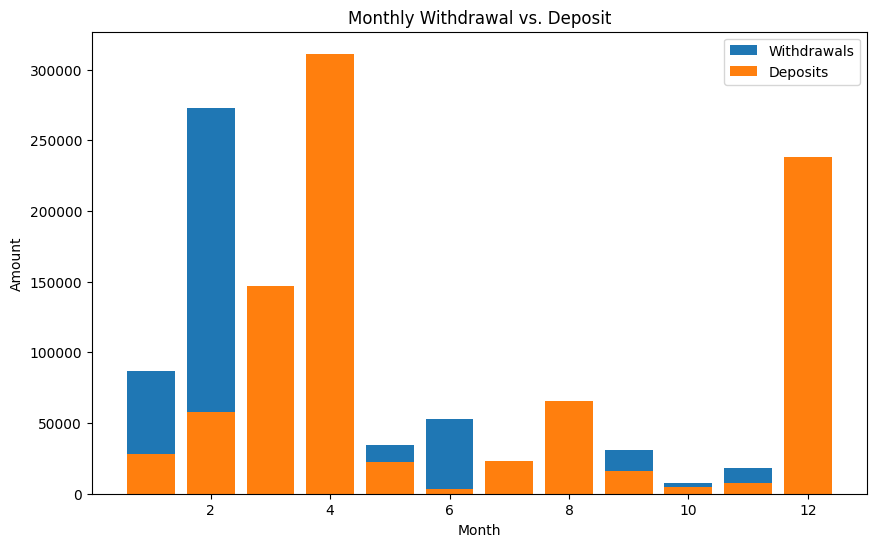

In [24]:
# Compare the monthly total withdrawal and deposit amounts.

monthly_withdrawals = data_bob.groupby('Month')['WITHDRAWAL(DR)'].sum()
monthly_deposits = data_bob.groupby('Month')['DEPOSIT(CR)'].sum()

plt.figure(figsize=(10, 6))
plt.bar(monthly_withdrawals.index, monthly_withdrawals, label='Withdrawals')
plt.bar(monthly_deposits.index, monthly_deposits, label='Deposits')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Withdrawal vs. Deposit')
plt.legend()
plt.show()

# Expenses by Day of the Month:

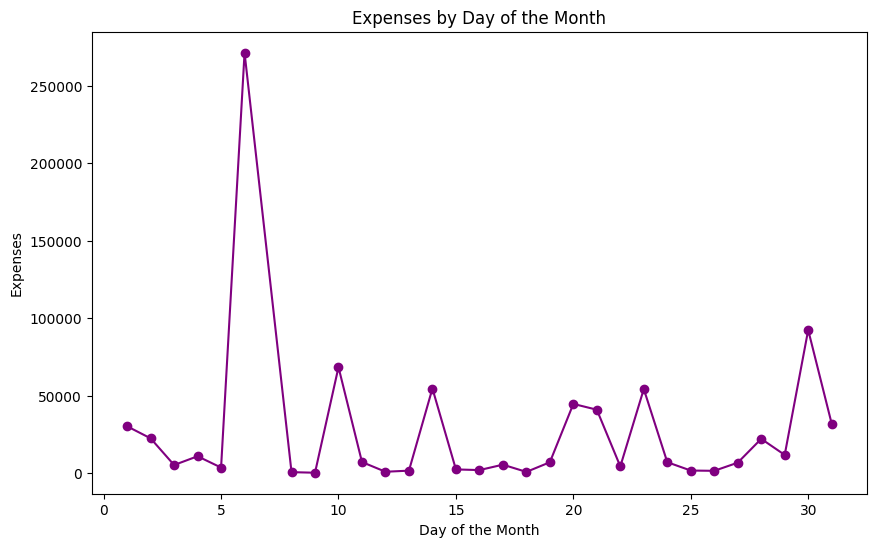

In [25]:
# Analyze your expenses on different days of the month.

expenses_by_day_of_month = data_bob.groupby(data_bob['DATE'].dt.day)['WITHDRAWAL(DR)'].sum()

plt.figure(figsize=(10, 6))
plt.plot(expenses_by_day_of_month.index, expenses_by_day_of_month, marker='o',color = "purple")
plt.xlabel('Day of the Month')
plt.ylabel('Expenses')
plt.title('Expenses by Day of the Month')
plt.show()